In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [7]:
import pandas as pd

data = pd.read_csv(r"C:\Users\vaish\Downloads\student_mental_health_survey.csv")

# Show first few rows
print(data.head())


  Academic Pressure Social Life  Sleep Hours Physical Activity     Diet  \
0              High        Good            6               Yes     Good   
1               Low     Average            4               Yes     Good   
2              High        Good            4               Yes     Poor   
3              High     Average            9               Yes  Average   
4               Low     Average            9               Yes     Poor   

   Screen Time Mental Health Issues  
0            4                  Yes  
1            8                  Yes  
2            6                  Yes  
3           10                  Yes  
4            7                  Yes  


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize an empty dictionary to store encoders (for later inverse transformation)
label_encoders = {}

# List of columns that need encoding
categorical_columns = ['Academic Pressure', 'Social Life', 'Physical Activity', 'Diet', 'Mental Health Issues']

# Apply LabelEncoder to each column
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save encoder

# Check the result
print(data.head())


   Academic Pressure  Social Life  Sleep Hours  Physical Activity  Diet  \
0                  0            1            6                  1     1   
1                  1            0            4                  1     1   
2                  0            1            4                  1     2   
3                  0            0            9                  1     0   
4                  1            0            9                  1     2   

   Screen Time  Mental Health Issues  
0            4                     1  
1            8                     1  
2            6                     1  
3           10                     1  
4            7                     1  


In [9]:
from sklearn.model_selection import train_test_split

# Separate input features (X) and target label (y)
X = data.drop('Mental Health Issues', axis=1)  # All columns except target
y = data['Mental Health Issues']               # Target column

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Check dimensions
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (160, 6)
Testing data shape: (40, 6)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Confirm training is done
print("Model training completed.")


Model training completed.


 Accuracy: 0.425

 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.53      0.41        15
           1       0.56      0.36      0.44        25

    accuracy                           0.42        40
   macro avg       0.45      0.45      0.42        40
weighted avg       0.48      0.42      0.43        40


 Confusion Matrix:
 [[ 8  7]
 [16  9]]


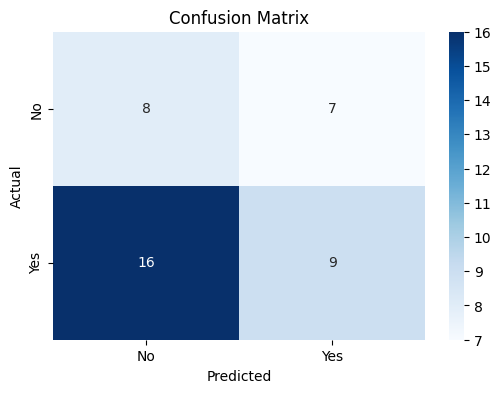

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test set
y_pred = model.predict(X_test)

# Print accuracy
print(" Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Example survey data from a student
new_student = pd.DataFrame([{
    'Academic Pressure': label_encoders['Academic Pressure'].transform(['High'])[0],
    'Social Life': label_encoders['Social Life'].transform(['Poor'])[0],
    'Sleep Hours': 5,
    'Physical Activity': label_encoders['Physical Activity'].transform(['No'])[0],
    'Diet': label_encoders['Diet'].transform(['Poor'])[0],
    'Screen Time': 9
}])


In [16]:
# Make prediction
prediction = model.predict(new_student)

# Convert numerical output back to label (Yes/No)
result = label_encoders['Mental Health Issues'].inverse_transform(prediction)[0]

print(" Mental Health Risk Prediction:", result)


 Mental Health Risk Prediction: Yes


C:\Users\vaish\AppData\Local\Temp\ipykernel_15336\3746940409.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


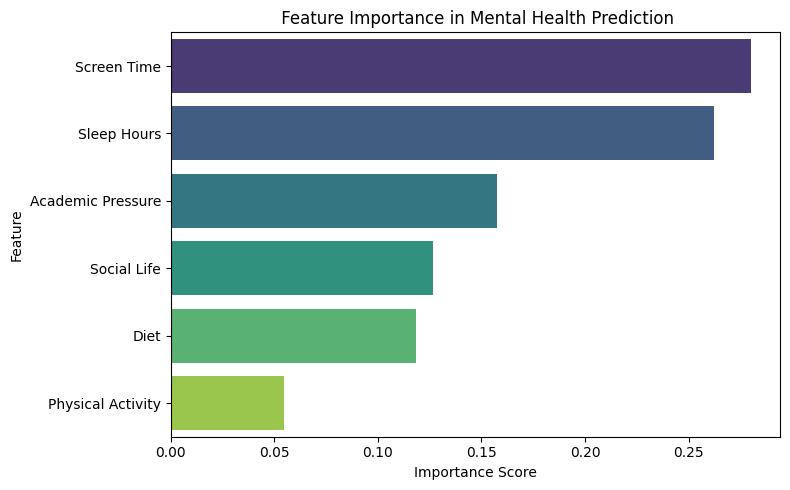

In [18]:
# Get feature importance from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title(" Feature Importance in Mental Health Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
